# 你好

In [5]:
# -*- encoding:utf-8 -*-
import numpy as np
import numpy.fft as nf
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt

sample_rate, sigs = wf.read('data/qpd.wav')
print(sample_rate)      # 8000采样率
print(sigs.shape)   # (3251,)
sigs = sigs / (2 ** 15) # 归一化
times = np.arange(len(sigs)) / sample_rate
freqs = nf.fftfreq(sigs.size, 1 / sample_rate)
ffts = nf.fft(sigs)
pows = np.abs(ffts)
plt.figure('Audio')
plt.subplot(121)
plt.title('Time Domain')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Signal', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.plot(times, sigs, c='dodgerblue', label='Signal')
plt.legend()
plt.subplot(122)
plt.title('Frequency Domain')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.plot(freqs[freqs >= 0], pows[freqs >= 0], c='orangered', label='Power')
plt.legend()
plt.tight_layout()
plt.show()        

44100
(12195708, 2)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 12195708 but corresponding boolean dimension is 24391416

/home/fuyanzhang/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


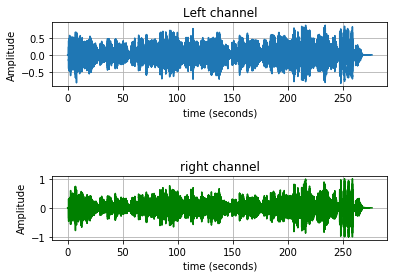

In [6]:
# -*- coding: utf-8 -*-
# 读Wave文件并且绘制波形
import wave
import matplotlib.pyplot as plt
import numpy as np

# 打开WAV音频
f = wave.open(r"data/qpd.wav", "rb")

# 读取格式信息
# (声道数、量化位数、采样频率、采样点数、压缩类型、压缩类型的描述)
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
# nchannels通道数 = 2
# sampwidth量化位数 = 2
# framerate采样频率 = 22050
# nframes采样点数 = 53395

# 读取nframes个数据，返回字符串格式
str_data = f.readframes(nframes)

f.close()

#将字符串转换为数组，得到一维的short类型的数组
wave_data = np.fromstring(str_data, dtype=np.short)

# 赋值的归一化
wave_data = wave_data*1.0/(max(abs(wave_data)))

# 整合左声道和右声道的数据
wave_data = np.reshape(wave_data,[nframes,nchannels])
# wave_data.shape = (-1, 2)   # -1的意思就是没有指定,根据另一个维度的数量进行分割

# 最后通过采样点数和取样频率计算出每个取样的时间
time = np.arange(0, nframes) * (1.0 / framerate)

plt.figure()
# 左声道波形
plt.subplot(3,1,1)
plt.plot(time, wave_data[:,0])
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.title("Left channel")
plt.grid()  # 标尺

plt.subplot(3,1,3)
# 右声道波形
plt.plot(time, wave_data[:,1], c="g")
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.title("Left channel")
plt.title("right channel")
plt.grid()

plt.show()